<a href="https://colab.research.google.com/github/san-saha/Quantum-ChaCha/blob/main/ARX_single_round.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pylatexenc
! pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     |████████████████████████████████| 162 kB 7.6 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136835 sha256=018687362aa956b8712a7b3245a67f9d8f2c0121d6b0d914bb89be2c73fe437b
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-jmypfdza
  Running command git clone -q https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-jmypfdza
     |████████████████████████████████| 6.5 MB 6.0 MB/s 
     |████████████████████████████████| 18.0 MB 1.3 MB/s 
     |████████████████████████████████| 238 kB 52.3 MB/s 
     |████████████████████████████████| 200 kB 70.9 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 1.6 MB 49.5 MB/s 
     |████████████████████████████████| 943 kB 49.3 MB/s 
     |███████████████████████████

In [ ]:
from qiskit.providers.aer import AerSimulator

In [ ]:
from qiskit import *

#### Addition utility function

In [ ]:
def add(n):
  a = QuantumRegister(n,'a')
  b = QuantumRegister(n,'b')
  ancilla = QuantumRegister(1, 'ancilla')
  z = QuantumRegister(1, 'z')
  qc = QuantumCircuit (a, b, ancilla, z, name="add")
  # qc = QuantumCircuit (a, b, ancilla, name="add")
  # qc.draw(output='mpl')

  for i in range(1,n):
    qc.cx(a[i],b[i])

  qc.cx(a[1], ancilla)
  qc.ccx(a[0], b[0], ancilla)
  qc.cx(a[2], a[1])
  qc.ccx(ancilla, b[1], a[1])
  qc.cx(a[3], a[2])

  for i in range(2,n-2):        
    qc.ccx(a[i-1],b[i],a[i])
    qc.cx(a[i+2],a[i+1])

  qc.ccx(a[n-3],b[n-2],a[n-2])
  qc.cx(a[n-1],z)

  qc.ccx(a[n-2],b[n-1],z)
  for i in range(1, n-1):
    qc.x(b[i])

  qc.cx(ancilla, b[1])
  for i in range(2, n):
    qc.cx(a[i-1],b[i])

  qc.ccx(a[n-3],b[n-2],a[n-2])
  for i in range(n-3,1,-1):
    qc.ccx(a[i-1],b[i],a[i])
    qc.cx(a[i+2],a[i+1])
    qc.x(b[i+1])

  qc.ccx(ancilla,b[1],a[1])
  qc.cx(a[3],a[2])
  qc.x(b[2])

  qc.ccx(a[0],b[0],ancilla)
  qc.cx(a[2],a[1])
  qc.x(b[1])

  qc.cx(a[1],ancilla)

  for i in range(0,n):
    qc.cx(a[i],b[i])

  # qc.measure_all()
  # qc.draw(output='mpl', filename="add_"+str(n))
  return qc

In [ ]:
def additionMod32(n):           # a,b..........a,b=a+b
  a = QuantumRegister(n,'a')
  b = QuantumRegister(n,'b')
  ancilla = QuantumRegister(1, 'ancilla')
  qc = QuantumCircuit (a, b, ancilla,  name="add_mod_32")

  l=list(range(n*2+1))
  l.remove(n-1)
  l.remove(n*2-1)

  add_circuit=add(n-1)
  print("additionMod32")
  qc.append(add_circuit, l+[n*2-1])
  qc.cx(a[n-1],b[n-1])

  return qc

#### XOR utility function

In [ ]:
def XOR(n):             # a,b ............ a=a^b,b
  a=QuantumRegister(n,'a')
  b=QuantumRegister(n,'b')
  qc=QuantumCircuit(a,b, name="XOR")
  for i in range(n):
    qc.cx(b[i],a[i])

  # qc.draw(output='mpl', filename='XOR')
  
  return qc

#### Rotation utility

In [ ]:
def swap_n(n):          # n is size of each register

  a=QuantumRegister(n,'a')
  b=QuantumRegister(n,'b')
  qc=QuantumCircuit(a,b,name="swap_"+str(n))

  for i in range(n):
    qc.swap(a[i],b[i])

  # qc.draw(output='mpl', filename="swap_"+str(n))

  return qc

##### rotate16

In [ ]:
def rotate16(n):
  a=QuantumRegister(n,'a')
  qc=QuantumCircuit(a, name="rotate16")

  qc.append(swap_n(16), range(n))           #counting 0 starts form LSB
  # qc.draw(output='mpl', filename='rotate16')

  return qc


##### rotate8

In [ ]:
def rotate8(n):
  a=QuantumRegister(n,'a')
  qc=QuantumCircuit(a, name="rotate8")

  # print(range(8*0,8*2))
  qc.append(swap_n(8), range(8*0,8*2))

  qc.append(swap_n(8), range(8*2,8*4))


  l=list(range(8*0,8*1))
  m=list(range(8*2,8*3))
  # print(l+m)
  qc.append(swap_n(8), l+m)
  # qc.draw(output='mpl', filename="rotate8")

  return qc

##### rotate12

In [ ]:
def rotate12(n):
  a=QuantumRegister(n,'a')
  qc=QuantumCircuit(a,name="rotate12")


  l=list(range(4*0,4*1))        # 8 block
  m=list(range(4*2,4*3))        # 6 block
  qc.append(swap_n(4), l+m)

  l=list(range(4*2,4*3))        # 6 block
  m=list(range(4*1,4*2))        # 7 block
  qc.append(swap_n(4), l+m)

  l=list(range(4*4,4*5))        # 4 block
  m=list(range(4*2,4*3))        # 6 block
  qc.append(swap_n(4), l+m)

  l=list(range(4*1,4*2))        # 7 block
  m=list(range(4*3,4*4))        # 5 block
  qc.append(swap_n(4), l+m)

  l=list(range(4*2,4*3))        # 6 block
  m=list(range(4*7,4*8))        # 1 block
  qc.append(swap_n(4), l+m)
  
  l=list(range(4*1,4*2))        # 7 block
  m=list(range(4*6,4*7))        # 2 block
  qc.append(swap_n(4), l+m)
  
  l=list(range(4*0,4*1))        # 8 block
  m=list(range(4*5,4*6))        # 3 block
  qc.append(swap_n(4), l+m)

  # qc.draw(output='mpl', filename="rotate12")


  return qc

##### rotate7

In [ ]:
def rotate7(n):
  a=QuantumRegister(n,'a')
  qc=QuantumCircuit(a, name="rotate7")


  l=[0]     
  m=[2]       
  qc.append(swap_n(1), l+m)


  l=[3]        
  m=[2]       
  qc.append(swap_n(1), l+m)


  l=[0]        
  m=[1]       
  qc.append(swap_n(1), l+m)

  l=list(range(4,7))
  m=list(range(0,3))       
  qc.append(swap_n(3), l+m)

  l=list(range(7,11))       
  m=list(range(3,7))       
  qc.append(swap_n(4), l+m)

  l=list(range(11,18))       
  m=list(range(0,7))       
  qc.append(swap_n(7), l+m)

  l=list(range(18,25))       
  m=list(range(0,7))       
  qc.append(swap_n(7), l+m)

  l=list(range(25,32))       
  m=list(range(0,7))       
  qc.append(swap_n(7), l+m)

  # qc.draw(output='mpl', filename="rotate7")
  
  return qc

##### measure

In [ ]:
def measure(qc):
  # Select the AerSimulator from the Aer provider
  simulator = AerSimulator(method='matrix_product_state')

  # Run and get counts, using the matrix_product_state method
  tcirc = transpile(qc, simulator)
  result = simulator.run(tcirc).result()
  counts = result.get_counts(0)
  print(counts)
  for key in counts.keys():

      print("A\t",key[-32:], "\t", hex(int(key[-32:],2)))
      print("B\t",key[-32*2:-32*1], "\t", hex(int(key[-32*2:-32*1],2)))
      print("C\t",key[-32*3:-32*2], "\t", hex(int(key[-32*3:-32*2],2)))
      print("D\t",key[-32*4:-32*3], "\t", hex(int(key[-32*4:-32*3],2)))

      # print("A\t",key[-32:])
      # print("B\t",key[-32*2:-32*1])
      # print("C\t",key[-32*3:-32*2])
      # print("D\t",key[-32*4:-32*3])
      print("i\t",key[6:8])
      print("j\t",key[4:6])
      print("k\t",key[2:4])
      print("l\t",key[0:2])

#### actual circuit

In [ ]:
a=QuantumRegister(32, 'a')
b=QuantumRegister(32, 'b')
c=QuantumRegister(32, 'c')
d=QuantumRegister(32, 'd')

ancilla = QuantumRegister(1, 'ancilla')

iR=QuantumRegister(2, 'iR')
jR=QuantumRegister(2, 'jR')
kR=QuantumRegister(2, 'kR')
lR=QuantumRegister(2, 'lR')

qc=QuantumCircuit(a,b,c,d,ancilla,iR,jR,kR,lR)


In [ ]:
# A=input("enter a")
# B=input("enter b")
# C=input("enter c")
# D=input("enter d")

# A,B,C,D = input("enter: ").split()
A,B,C,D = "61707865 03020100 13121110 00000001".split()
A=bin(int(A, 16))[2:].zfill(32)
B=bin(int(B, 16))[2:].zfill(32)
C=bin(int(C, 16))[2:].zfill(32)
D=bin(int(D, 16))[2:].zfill(32)
print(A,B,C,D,sep='\n')


01100001011100000111100001100101
00000011000000100000000100000000
00010011000100100001000100010000
00000000000000000000000000000001


enter a 61707865  
enter b 0302100  
enter c 13121110  
enter d 00000001  

61707865 03020100 13121110 00000001  


In [ ]:


# A="01100001011100000111100001100101"
# B="11010000101110000011110000110011"
# C="01111111111101011111111001100101"
# D="00000000000000000000000000000001"

In [ ]:
len(A)

32

In [ ]:
A=A[::-1]
B=B[::-1]
C=C[::-1]
D=D[::-1]

for i in range(len(A)):
  if A[i]=='1':
    qc.x(a[i])

for i in range(len(B)):
  if B[i]=='1':
    qc.x(b[i])

for i in range(len(C)):
  if C[i]=='1':
    qc.x(c[i])

for i in range(len(D)):
  if D[i]=='1':
    qc.x(d[i])

qc.barrier()

In [ ]:
qc1=qc.copy()
qc1.measure_all()
measure(qc1)

{'00000000000000000000000000000000000000001000100110001001000010001000100000000001100000010000000010000000001100001011100000111100001100101': 1024}
A	 01100001011100000111100001100101 	 0x61707865
B	 00000011000000100000000100000000 	 0x3020100
C	 00010011000100100001000100010000 	 0x13121110
D	 00000000000000000000000000000001 	 0x1
i	 00
j	 00
k	 00
l	 00


In [ ]:
a_l=list(range(32*0,32*1))        # A block
b_l=list(range(32*1,32*2))        # B block
c_l=list(range(32*2,32*3))        # C block
d_l=list(range(32*3,32*4))        # D block
ancilla_l=list([32*4])

##### one block arx

In [ ]:
qc.append(additionMod32(32), b_l+a_l+ancilla_l)         # a+=b
qc.append(XOR(32), d_l+a_l)                             # d^=a
qc.append(rotate16(32), d_l)                            # d<<<16

qc.barrier()

additionMod32


In [ ]:
qc1=qc.copy()
qc1.measure_all()
measure(qc1)

{'00000000001111001011001000110010001110010000100110001001000010001000100000000001100000010000000010000000001100100011100100111100101100101': 1024}
A	 01100100011100100111100101100101 	 0x64727965
B	 00000011000000100000000100000000 	 0x3020100
C	 00010011000100100001000100010000 	 0x13121110
D	 01111001011001000110010001110010 	 0x79646472
i	 00
j	 00
k	 00
l	 00


In [ ]:
qc.append(additionMod32(32), d_l+c_l+ancilla_l)           # c+=d
qc.append(XOR(32), b_l+c_l)                               # b^=c
qc.append(rotate12(32), b_l)                              # b<<<12

qc.barrier()

additionMod32


In [ ]:
qc1=qc.copy()
qc1.measure_all()
measure(qc1)

{'00000000001111001011001000110010001110010100011000111011001110101100000100100011101001000001010001111011101100100011100100111100101100101': 1024}
A	 01100100011100100111100101100101 	 0x64727965
B	 01000111010010000010100011110111 	 0x474828f7
C	 10001100011101100111010110000010 	 0x8c767582
D	 01111001011001000110010001110010 	 0x79646472
i	 00
j	 00
k	 00
l	 00


In [ ]:
qc.append(additionMod32(32), b_l+a_l+ancilla_l)           # a+=b
qc.append(XOR(32), d_l+a_l)                               # d^=a
qc.append(rotate8(32), d_l)                               # d<<<8

qc.barrier()

additionMod32


In [ ]:
qc1=qc.copy()
qc1.measure_all()
measure(qc1)

{'00000000011011110110001100010111011010010100011000111011001110101100000100100011101001000001010001111011110101011101110101010001001011100': 1024}
A	 10101011101110101010001001011100 	 0xabbaa25c
B	 01000111010010000010100011110111 	 0x474828f7
C	 10001100011101100111010110000010 	 0x8c767582
D	 11011110110001100010111011010010 	 0xdec62ed2
i	 00
j	 00
k	 00
l	 00


In [ ]:
qc.append(additionMod32(32), d_l+c_l+ancilla_l)           # c+=d
qc.append(XOR(32), b_l+c_l)                               # b^=c
qc.append(rotate7(32), b_l)                               # b<<<7

qc.barrier()

additionMod32


In [ ]:
qc1=qc.copy()
qc1.measure_all()
measure(qc1)

{'00000000011011110110001100010111011010010011010110011110010100100010101000011101001000110010100011001011010101011101110101010001001011100': 1024}
A	 10101011101110101010001001011100 	 0xabbaa25c
B	 00111010010001100101000110010110 	 0x3a465196
C	 01101011001111001010010001010100 	 0x6b3ca454
D	 11011110110001100010111011010010 	 0xdec62ed2
i	 00
j	 00
k	 00
l	 00


##### back to main

In [ ]:
# decrease 1 from j register
qc.cx(jR[0],jR[1])
qc.x(jR[1])
qc.x(jR[0])

# decrease 2 from k register
qc.x(kR[1])

# decrease 3 from l register
qc.cx(lR[0],lR[1])  
qc.x(lR[0])

qc.barrier()

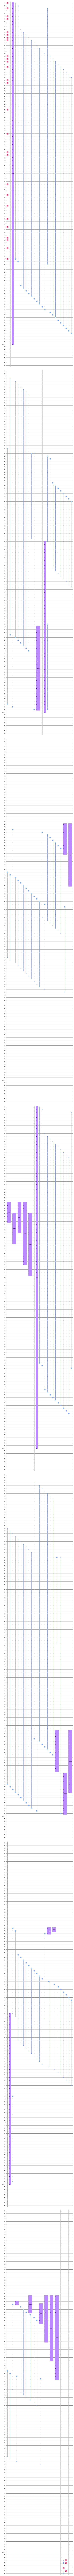

In [ ]:
qc.decompose().draw(output='mpl', scale=0.5, filename="arx1round_decomposed")

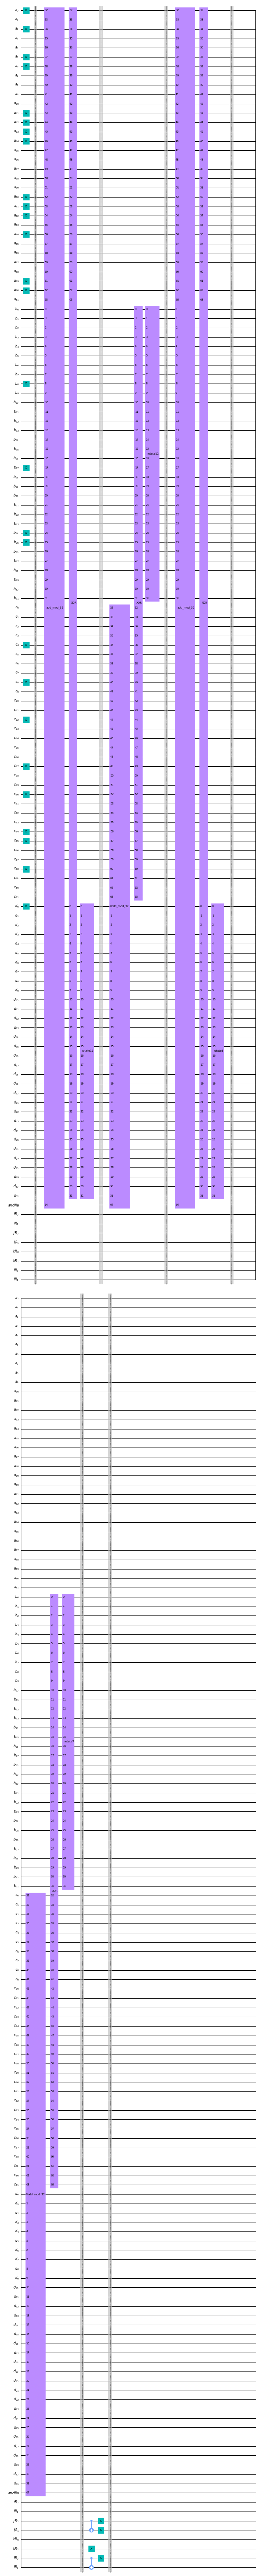

In [ ]:
qc.draw(output='mpl', scale=0.5, filename="arx1round")

In [ ]:
qc1=qc.copy()
qc1.measure_all()
measure(qc1)

{'01101100011011110110001100010111011010010011010110011110010100100010101000011101001000110010100011001011010101011101110101010001001011100': 1024}
A	 10101011101110101010001001011100 	 0xabbaa25c
B	 00111010010001100101000110010110 	 0x3a465196
C	 01101011001111001010010001010100 	 0x6b3ca454
D	 11011110110001100010111011010010 	 0xdec62ed2
i	 00
j	 11
k	 10
l	 01


In [ ]:
# qc.measure_all()

In [ ]:
# measure(qc)

{'01101100011011110110001100010111011010010011010110011110010100100010101000011101001000110010100011001011010101011101110101010001001011100': 1024}
A	 10101011101110101010001001011100 	 0xabbaa25c
B	 00111010010001100101000110010110 	 0x3a465196
C	 01101011001111001010010001010100 	 0x6b3ca454
D	 11011110110001100010111011010010 	 0xdec62ed2
i	 00
j	 11
k	 10
l	 01


In [ ]:
# # Select the AerSimulator from the Aer provider
# simulator = AerSimulator(method='matrix_product_state')

# # Run and get counts, using the matrix_product_state method
# tcirc = transpile(qc, simulator)
# result = simulator.run(tcirc).result()
# counts = result.get_counts(0)
# print(counts)
# for key in counts.keys():

#     print("A\t",key[-32:], "\t", hex(int(key[-32:],2)))
#     print("B\t",key[-32*2:-32*1], "\t", hex(int(key[-32*2:-32*1],2)))
#     print("C\t",key[-32*3:-32*2], "\t", hex(int(key[-32*3:-32*2],2)))
#     print("D\t",key[-32*4:-32*3], "\t", hex(int(key[-32*4:-32*3],2)))

#     # print("A\t",key[-32:])
#     # print("B\t",key[-32*2:-32*1])
#     # print("C\t",key[-32*3:-32*2])
#     # print("D\t",key[-32*4:-32*3])
#     print("i\t",key[6:8])
#     print("j\t",key[4:6])
#     print("k\t",key[2:4])
#     print("l\t",key[0:2])

In [ ]:
a="00110101010100001100010110101011"
hex(int(a,2))

'0x3550c5ab'

In [ ]:
a="01010101001010010000110100011001"
hex(int(a,2))

'0x55290d19'

In [ ]:
a="01100001000110100111111001011100"
hex(int(a,2))

'0x611a7e5c'

In [ ]:
a="00110100101001000000101110101100"
hex(int(a,2))

'0x34a40bac'

In [ ]:
bin(int("dec62ed2",16))

'0b11011110110001100010111011010010'

In [ ]:

# A,B,C,D = input("enter: ").split()
A,B,C,D = "61707865 0302100 13121110 00000001".split()
A=int(A, 16)
B=int(B, 16)
C=int(C, 16)
D=int(D, 16)
print(A,B,C,D,sep='\n')


1634760805
3154176
319951120
1


In [ ]:
A+=B
A &= 0xffffffff
D^=A
# print(bin(D)[2:])
D = (D << 16) | (D >> (32-16))
D &= 0xffffffff
# print(hex(dasdas)[-8:])
# print(bin(dasdas)[-32:])
print(hex(A))
print(hex(B))
print(hex(C))
print(hex(D))

0x61a09965
0x302100
0x13121110
0x996461a0


In [ ]:
hex(0x13121110+0x996461a0)

'0xac7672b0'

In [ ]:
C+=D
C &= 0xffffffff
B^=C
B = (B << 12) | (B >> (32-12))
B &= 0xffffffff
print(hex(A))
print(hex(B))
print(hex(C))
print(hex(D))

0x61a09965
0x653b0ac4
0xac7672b0
0x996461a0


In [ ]:
A+=B
A &= 0xffffffff
D^=A
D = (D << 8) | (D >> (32-8))
D &= 0xffffffff
print(hex(A))
print(hex(B))
print(hex(C))
print(hex(D))

0xc6dba429
0x653b0ac4
0xac7672b0
0xbfc5895f


In [ ]:
C+=D
C &= 0xffffffff
B^=C
B = (B << 7) | (B >> (32-7))
B &= 0xffffffff
print(hex(A))
print(hex(B))
print(hex(C))
print(hex(D))

0xc6dba429
0x807b6584
0x6c3bfc0f
0xbfc5895f


In [ ]:
bin(int("996461a0",16))

'0b10011001011001000110000110100000'

In [ ]:
bin(int("61a09964",16))

'0b1100001101000001001100101100100'